#  House Price Forecasting Regression

## Obtaining and wrangling data variables in the model


This is the first step in building the regression model. This module will import and clean necessary data imports to get a singular dataset with the desired variables. The next module will perform explaratory data analysis to determine important variables, correlations, and other analysis before running the model.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

os.listdir()
data_path = '/data/'


The first variable imported will be the average mortgage rate for a 30 year fixed rate mortgage. This data is available as a daily frequency and will need to be resampled to a monthly frequency for consistency through the model. The data is received from the St. Louis Federal Reserve Bank. The daily levels and changes will be taken for further analysis. Data is found at:

https://fred.stlouisfed.org/categories/114


In [2]:
wkmortrates = pd.read_excel('data/mortrates.xls', index_col=0, sheet_name='weekly')
wkmortrates.columns = ['Rate', 'Change']
wkmortrates.index.names = ['Date']
wkmortrates.tail(2)

,Rate,Change
Date,,
2019-03-21,4.28,-0.03
2019-03-28,4.06,-0.22


Now to convert the daily time series to a monthly frequency. Ensure the data is in the format %Y-%m-%d or else issues may arise. Of note is that by averaging up to to a monthly frequency has smoothed out the time series as expected.

Note: may need to adjust for seasonality but skipping for now.

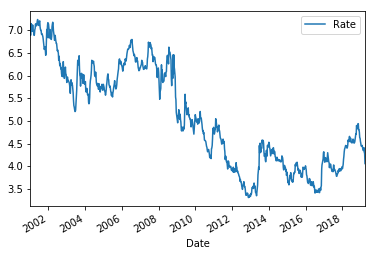

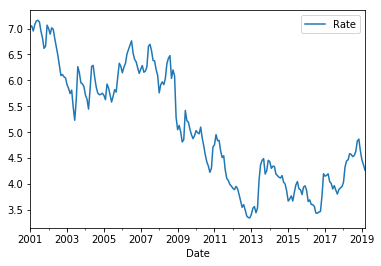

In [3]:
monmortrates = wkmortrates.resample('1M').mean()
wkmortrates.plot(y='Rate')
monmortrates.plot(y='Rate')

The next variable to import is existing home sales. This data is provided by zilllow and the link can be found below. This data is under the "home listing and sales" section. Data is available for seasonally adjusted and non-seasonally adjusted. For now the non-seasonaly adjusted variable will be brought in to avoid seasonal adjustments for the initial model. There is distinct seasonally visible at a glance.

Another issue that will need to be identified is missing data points. At first glance, zillow data looks to have many sporadic missing datapoints in their datasets. Since this is a time series, we may be able to fill in missing data using an interpolation if there are datapoints before and after the missing point.

This data lags by two months. For examples on 03/2019, data is only available up to 01/2019.

https://www.zillow.com/research/data/

,Level
Date,
2018-09,415894
2018-10,456663
2018-11,395033
2018-12,369235
2019-01,312636


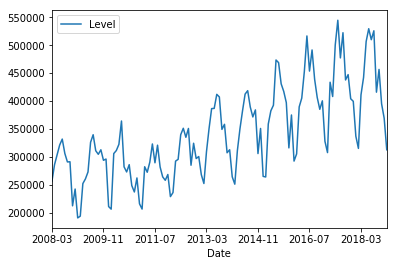

In [18]:
salescount = pd.read_csv('data/Sale_Counts_Msa.csv', nrows=1)
salescount_T = salescount.T.dropna()
salescount_T.columns = ['Level']
salescount_T.index.names = ['Date']
salescount_T = salescount_T[~salescount_T.index.isin(['RegionName', 'RegionID', 'SizeRank'])]

salescount_T.plot()
salescount_T.tail()

The next data set is the number of monthly for-sale inventory. This will be used to identify the existing supply in the market in a given month for home purchases. This data, like the sales, is non-seasonally adjusted for now. This data lags for behind 1 month.

After graphing, this data looks to follow the sales data very closely.

https://www.zillow.com/research/data/

,Level
Date,
2018-10,1738363
2018-11,1555305
2018-12,1400833
2019-01,1449980
2019-02,1397460


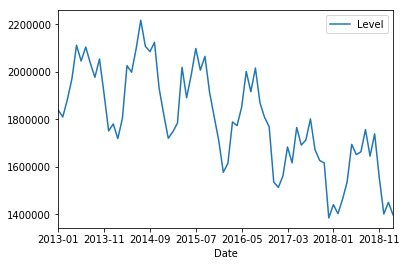

In [17]:
listing = pd.read_csv('data/monlistings_NSA.csv', nrows=1)
listing_T = listing.T.dropna()
listing_T.columns = ['Level']
listing_T.index.names = ['Date']
listing_T = listing_T[~listing_T.index.isin(['RegionName', 'RegionID', 'SizeRank', 'RegionType'])]

listing_T.plot()
listing_T.tail()

Next is median rental price. This will serve as a measure for attractiveness of subsitutes to home owning. This indicator could be flawed in use but will satisfy needs for initial model.

https://www.zillow.com/research/data/

,Level
Date,
2018-10,1649
2018-11,1629
2018-12,1625
2019-01,1600
2019-02,1650


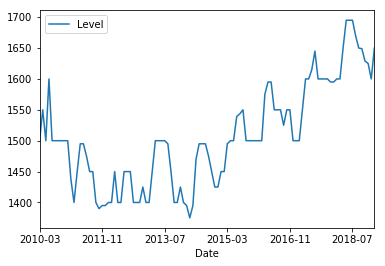

In [15]:
medrent = pd.read_csv('data/medrent.csv', nrows=1)
medrent = medrent.T.dropna()
medrent.columns = ['Level']
medrent.index.names = ['Date']
medrent = medrent[~medrent.index.isin(['RegionName', 'RegionID', 'SizeRank', 'RegionType'])]

medrent.plot()
medrent.tail()

Next variable is median house hold income to extroplate consumer buying power.

https://www.zillow.com/research/data/

,Level
Date,
2017-12,61477.3
2018-03,61936.6
2018-06,62395.9
2018-09,62855.2
2018-12,63314.6


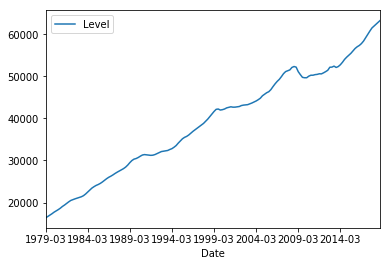

In [19]:
medhh = pd.read_csv('data/medhhincome.csv', nrows=1)
medhh = medhh.T.dropna()
medhh.columns = ['Level']
medhh.index.names = ['Date']
medhh = medhh[~medhh.index.isin(['RegionName', 'RegionID', 'SizeRank', 'RegionType'])]

medhh.plot()
medhh.tail()